In [1]:
import pandas as pd
import numpy as np
import re
import spacy.cli
from datetime import datetime

D:\Users\Jhonnatan\anaconda3\envs\Galileo_2022\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Users\Jhonnatan\anaconda3\envs\Galileo_2022\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
D:\Users\Jhonnatan\anaconda3\envs\Galileo_2022\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:

df = pd.read_csv("training.csv", encoding='latin-1')
df

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
headerList = ['ROW','ID', 'DATE', 'QUERY','USER', 'TWEET'] 
  
df.to_csv("header_csv.csv", header=headerList, index=False) 


In [4]:
file2 = pd.read_csv("header_csv.csv") 
file2

,ROW,ID,DATE,QUERY,USER,TWEET
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [5]:
test = file2.iloc[1,5]
test

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

# 2.1 Obteniendo los primeros tres mas mencionados

In [6]:
def get_mention(tweet):
    pattern = r"@[^ ]*"
    try:
        matches = re.findall(pattern, tweet)
        matches =  matches[0].replace(' ','')
    except:
        pass
    return matches

In [7]:
atts = file2['TWEET'].apply(get_mention)

In [8]:
atts.value_counts()

[]                853568
@                   7835
@mileycyrus         4155
@tommcfly           3733
@ddlovato           3170
                   ...  
@wsteffen3             1
@SecondLife            1
@cookieslagoon         1
@Santolin              1
@Roy_Everitt           1
Name: TWEET, Length: 346611, dtype: int64

In [9]:
nlp = spacy.load("en_core_web_sm")

In [10]:
file2.dtypes

ROW       int64
ID        int64
DATE     object
QUERY    object
USER     object
TWEET    object
dtype: object

### 2.1.1 Normalización de Texto

In [11]:
def Normalizacion(corpus):
    newCorpus = []
    newCorpus.append(re.sub(r'[^a-zA-Z0-9]+\s{1}',"",corpus))
    return newCorpus

In [12]:
corpus_test = Normalizacion(test)
corpus_test




['@Kenichan I dived many times for the ballManaged to save 50The rest go out of bounds']

In [13]:
norm = file2['TWEET'].apply(Normalizacion)
norm

0          [is upset that he can't update his Facebook by...
1          [@Kenichan I dived many times for the ballMana...
2          [my whole body feels itchy and like its on fire ]
3          [@nationwideclass noit's not behaving at alli'...
4                            [@Kwesidei not the whole crew ]
                                 ...                        
1599994    [Just woke upHaving no school is the best feel...
1599995    [TheWDB.comVery cool to hear old Walt intervie...
1599996    [Are you ready for your MoJo MakeoverAsk me fo...
1599997    [Happy 38th Birthday to my boo of alll timeTup...
1599998    [happy #charitytuesday @theNSPCC @SparksCharit...
Name: TWEET, Length: 1599999, dtype: object

### 2.1.2 Timestamp

In [14]:
def fecha(corpus):
    newCorpus = []
    newCorpus.append(corpus)
    return newCorpus

In [15]:
date = file2['DATE'].apply(Normalizacion)
date

0          [Mon Apr 06 22:19:49 PDT 2009]
1          [Mon Apr 06 22:19:53 PDT 2009]
2          [Mon Apr 06 22:19:57 PDT 2009]
3          [Mon Apr 06 22:19:57 PDT 2009]
4          [Mon Apr 06 22:20:00 PDT 2009]
                        ...              
1599994    [Tue Jun 16 08:40:49 PDT 2009]
1599995    [Tue Jun 16 08:40:49 PDT 2009]
1599996    [Tue Jun 16 08:40:49 PDT 2009]
1599997    [Tue Jun 16 08:40:49 PDT 2009]
1599998    [Tue Jun 16 08:40:50 PDT 2009]
Name: DATE, Length: 1599999, dtype: object

### 2.1.3 Largo del Tweet

In [16]:
def largo_tweet(corpus):
    newCorpus = []
    newCorpus.append(len(corpus))
    return newCorpus

In [17]:
largo = file2['TWEET'].apply(largo_tweet)
largo

0          [111]
1           [89]
2           [47]
3          [111]
4           [29]
           ...  
1599994     [56]
1599995     [78]
1599996     [57]
1599997     [65]
1599998     [62]
Name: TWEET, Length: 1599999, dtype: object

### 2.1.4 ID usuario

In [18]:
def usuario(corpus):
    newCorpus = []
    
    if corpus == None:
        corpus = "Undefined"
    else:
        corpus 
    newCorpus.append(corpus)
    return newCorpus

In [19]:
usuario = file2['USER'].apply(usuario)
usuario

0            [scotthamilton]
1                 [mattycus]
2                  [ElleCTF]
3                   [Karoli]
4                 [joy_wolf]
                 ...        
1599994    [AmandaMarie1028]
1599995        [TheWDBoards]
1599996             [bpbabe]
1599997       [tinydiamondz]
1599998     [RyanTrevMorris]
Name: USER, Length: 1599999, dtype: object

In [20]:
#usuario.value_counts()

# UNIENDO EN UN DATAFRAME INCISO 2

In [21]:
df = pd.DataFrame(
    {'Content': norm,
     'ID': usuario,
     'Timestamp': date,
     'Tweet_lenght': largo,
     'Mention': atts
     }).reset_index()

In [22]:
df

,index,Content,ID,Timestamp,Tweet_lenght,Mention
0,0,[is upset that he can't update his Facebook by...,[scotthamilton],[Mon Apr 06 22:19:49 PDT 2009],[111],[]
1,1,[@Kenichan I dived many times for the ballMana...,[mattycus],[Mon Apr 06 22:19:53 PDT 2009],[89],@Kenichan
2,2,[my whole body feels itchy and like its on fire ],[ElleCTF],[Mon Apr 06 22:19:57 PDT 2009],[47],[]
3,3,[@nationwideclass noit's not behaving at alli'...,[Karoli],[Mon Apr 06 22:19:57 PDT 2009],[111],@nationwideclass
4,4,[@Kwesidei not the whole crew ],[joy_wolf],[Mon Apr 06 22:20:00 PDT 2009],[29],@Kwesidei
...,...,...,...,...,...,...
1599994,1599994,[Just woke upHaving no school is the best feel...,[AmandaMarie1028],[Tue Jun 16 08:40:49 PDT 2009],[56],[]
1599995,1599995,[TheWDB.comVery cool to hear old Walt intervie...,[TheWDBoards],[Tue Jun 16 08:40:49 PDT 2009],[78],[]
1599996,1599996,[Are you ready for your MoJo MakeoverAsk me fo...,[bpbabe],[Tue Jun 16 08:40:49 PDT 2009],[57],[]
1599997,1599997,[Happy 38th Birthday to my boo of alll timeTup...,[tinydiamondz],[Tue Jun 16 08:40:49 PDT 2009],[65],[]


# PRIMER DATA FRAME

In [23]:
mileycyrus =  df[df['Mention'] == '@mileycyrus']
mileycyrus

,index,Content,ID,Timestamp,Tweet_lenght,Mention
1020,1020,[@mileycyrus hahaha dont be like that one time...,[kristenn_lynn],[Mon Apr 06 23:30:57 PDT 2009],[107],@mileycyrus
2013,2013,[@mileycyrus i have the same problembut it's 4...,[nathiuria],[Tue Apr 07 00:45:20 PDT 2009],[137],@mileycyrus
2072,2072,[@mileycyrus I guess counting sheep didn't wor...,[amyamoore],[Tue Apr 07 00:49:07 PDT 2009],[72],@mileycyrus
2079,2079,[@mileycyrus I would too if it meant spending ...,[xdokkenx],[Tue Apr 07 00:49:44 PDT 2009],[100],@mileycyrus
2155,2155,[@mileycyrus AWWW u seriously have the cutest ...,[XFearLessX],[Tue Apr 07 00:56:41 PDT 2009],[112],@mileycyrus
...,...,...,...,...,...,...
1595290,1595290,[Hey @mileycyrus I voted for you at the teen c...,[rumours12],[Tue Jun 16 06:52:58 PDT 2009],[104],@mileycyrus
1596795,1596795,[@mileycyrus http://twitpic.com/7f5fyI love yo...,[Maddeeeeee],[Tue Jun 16 07:31:21 PDT 2009],[112],@mileycyrus
1597904,1597904,[@mileycyrus i see the photos of your KISS iss...,[LizzMartin],[Tue Jun 16 07:55:55 PDT 2009],[74],@mileycyrus
1598347,1598347,[@mileycyrus i am definitley definitley gettin...,[lucyannedixon],[Tue Jun 16 08:04:20 PDT 2009],[139],@mileycyrus


In [24]:
#mileycyrus = mileycyrus.astype({'Content': 'string',  'Tweet_lenght': 'int32',
#                                'Mention': 'string'})
#mileycyrus.dtypes

# SEGUNDO DATA FRAME

In [25]:
tommcfly =  df[df['Mention'] == '@tommcfly']
tommcfly

,index,Content,ID,Timestamp,Tweet_lenght,Mention
1689,1689,[@tommcfly hey saw u guys playpushover..didn't...,[mcsteph94],[Tue Apr 07 00:19:09 PDT 2009],[138],@tommcfly
1788,1788,[@tommcfly Good morning TomWhy can't I send yo...,[mcflyholland],[Tue Apr 07 00:26:52 PDT 2009],[131],@tommcfly
2513,2513,[@tommcfly did you know that johnsons baby use...,[ckstarlet],[Tue Apr 07 01:23:07 PDT 2009],[96],@tommcfly
3523,3523,[@tommcfly heyno chance of adding brighton or ...,[lilmissvik],[Tue Apr 07 02:46:02 PDT 2009],[131],@tommcfly
3782,3782,[@tommcfly have fun tomi need to buy eclipse t...,[poyntersstargal],[Tue Apr 07 03:05:49 PDT 2009],[82],@tommcfly
...,...,...,...,...,...,...
1594578,1594578,[@tommcfly When the sun shinesthey slip into t...,[susanananananaa],[Tue Jun 16 06:38:47 PDT 2009],[106],@tommcfly
1594945,1594945,[@tommcfly you should record Star Girl with JB ],[Sarah_1991],[Tue Jun 16 06:46:41 PDT 2009],[46],@tommcfly
1595130,1595130,[@tommcfly why you at the studio thenjust watc...,[hannyb90],[Tue Jun 16 06:50:40 PDT 2009],[125],@tommcfly
1595193,1595193,[@tommcfly Gonna make a trip to England in the...,[JulesK_7],[Tue Jun 16 06:50:59 PDT 2009],[71],@tommcfly


# TERCER DATA FRAME

In [26]:
ddlovato =  df[df['Mention'] == '@ddlovato']
ddlovato

,index,Content,ID,Timestamp,Tweet_lenght,Mention
459,459,[@ddlovato @David_Henrie ummmmm i cant find it],[toritor11],[Mon Apr 06 22:51:34 PDT 2009],[47],@ddlovato
572,572,[@ddlovato Do you hate usPlease don't ],[lovatolover],[Mon Apr 06 22:58:30 PDT 2009],[40],@ddlovato
7031,7031,[@ddlovato Wish that i could see itThats the d...,[mariapersson],[Tue Apr 07 07:02:58 PDT 2009],[96],@ddlovato
7088,7088,[@ddlovato hey demiwen are you and selena gonn...,[xxBEJEALOUSxx],[Tue Apr 07 07:05:11 PDT 2009],[79],@ddlovato
8610,8610,[@ddlovato ahhhh i wish i could go to the dall...,[Julie_Dances],[Fri Apr 17 20:31:31 PDT 2009],[85],@ddlovato
...,...,...,...,...,...,...
1590265,1590265,[@ddlovato is there a deluxe edition cause the...,[annaryan],[Tue Jun 16 05:08:09 PDT 2009],[92],@ddlovato
1590350,1590350,[@ddlovato Hahaha Deminaughty DemiI love your ...,[SharlynVictorie],[Tue Jun 16 05:09:58 PDT 2009],[72],@ddlovato
1592765,1592765,[@ddlovato hope to see you soon ],[bogart17],[Tue Jun 16 06:00:23 PDT 2009],[31],@ddlovato
1593329,1593329,[@ddlovato I VOTEDcan't wait ],[chasing_lights],[Tue Jun 16 06:12:27 PDT 2009],[36],@ddlovato


# 3 TOKENIZACION

In [27]:
def tokenizacion(corpus):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(nlp(str(doc)))
    return newCorpus

# Removing stop words

In [28]:
def remove_stops(corpus):
    newCorpus = []
    for doc in corpus:
        s = ''
        for token in doc:
            if(token.is_stop == False):
                s = s + token.text + ' '
        newCorpus.append(s.strip())
    return newCorpus

# Steming

In [29]:
def steaming(corpus):
    documents = tokenizacion(corpus)
    newCorpus = []
    for doc in documents:
        s = ''
        for token in doc:
            s = s + token.lemma_ + ' '
        newCorpus.append(s.strip())
    return newCorpus

In [30]:
corpus_miley = mileycyrus['Content']
#corpus_miley
#corpus_miley = Normalizacion(corpus_miley)
#corpus_miley
corpus_miley2 = tokenizacion(corpus_miley)
#corpus_miley2 [:5]
corpus_miley3 = remove_stops(corpus_miley2)
#corpus_miley3[100]
corpus_miley4 = steaming(corpus_miley3)
#corpus_miley4[100]

In [31]:
corpus_tommcfly = tommcfly['Content']
#corpus_miley
#corpus_miley = Normalizacion(corpus_miley)
#corpus_miley
corpus_tommcfly2 = tokenizacion(corpus_tommcfly)
#corpus_miley2 [:5]
corpus_tommcfly3 = remove_stops(corpus_tommcfly2)
#corpus_miley3[100]
corpus_tommcfly4 = steaming(corpus_tommcfly3)
#corpus_miley4[100]

In [32]:
corpus_ddlovato = ddlovato['Content']
#corpus_miley
#corpus_miley = Normalizacion(corpus_miley)
#corpus_miley
corpus_ddlovato2 = tokenizacion(corpus_ddlovato)
#corpus_miley2 [:5]
corpus_ddlovato3 = remove_stops(corpus_ddlovato2)
#corpus_miley3[100]
corpus_ddlovato4 = steaming(corpus_ddlovato3)
#corpus_miley4[100]

# WORD CLOUD

In [37]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# WORD CLOUD - Mileycyrus

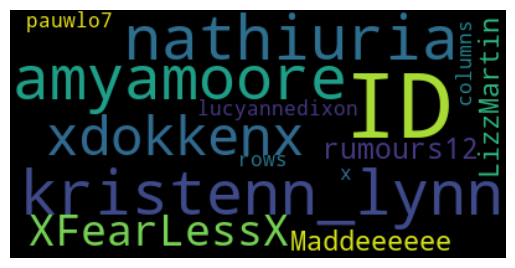

In [67]:
mileycyrus_user = mileycyrus.iloc[:, 2:3]
mileycyrus_user

# Create and generate a word cloud image:

#stop_w = set(STOPWORDS)
word_cloud = WordCloud().generate(str(mileycyrus_user))


#img = word_cloud.to_image()
#img.show()


# Display the generated image:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WORD CLOUD - Tommcfly

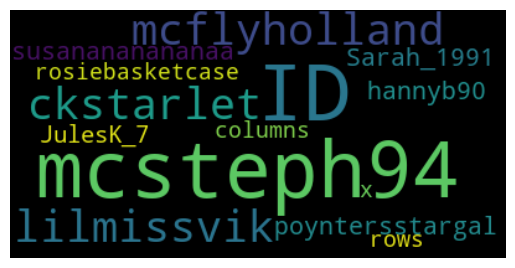

In [70]:
tommcfly_user = tommcfly.iloc[:, 2:3]
tommcfly_user

# Create and generate a word cloud image:

#stop_w = set(STOPWORDS)
word_cloud = WordCloud().generate(str(tommcfly_user))


#img = word_cloud.to_image()
#img.show()


# Display the generated image:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WORD CLOUD - Ddlovato

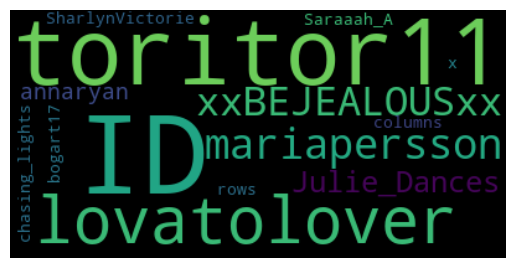

In [69]:
ddlovato_user = ddlovato.iloc[:, 2:3]
ddlovato_user

# Create and generate a word cloud image:

#stop_w = set(STOPWORDS)
word_cloud = WordCloud().generate(str(ddlovato_user))


#img = word_cloud.to_image()
#img.show()


# Display the generated image:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()